In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import pickle
import scipy.stats
import ast

In [2]:
dumas = pd.read_csv("resultados_dumas.csv", sep=";", index_col=0)

In [3]:
dumas

,FWIN,ADWIN
re,0.98,1.00
cf,0.95,0.98
lp,1.00,1.00
pl,0.98,1.00
cb,0.84,0.92
cm,0.91,1.00
cp,1.00,1.00
cd,1.00,0.88
pm,1.00,1.00
rp,0.96,0.96


In [4]:
results = pd.read_excel("[NOVO]resultados_agregados_sliding=False_agglomerative.xlsx", index_col=0)

In [5]:
results = pd.concat([
    pd.read_excel("NOVO_resultados_agregados_sliding=False_agglomerative.xlsx", index_col=0),
    pd.read_excel("NOVO_resultados_agregados_sliding=False.xlsx", index_col=0),
    pd.read_excel("NOVO_resultados_agregados_sliding=True.xlsx", index_col=0),
    pd.read_excel("NOVO_resultados_agregados_metricas_novas_representacoes_sliding=False.xlsx", index_col=0),
    pd.read_excel("NOVO_resultados_agregados_metricas_novas_representacoes.xlsx", index_col=0),
    pd.read_pickle("NOVO_resultados_agregados_exponential.pickle")
])

C:\Users\rafae\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [6]:
min_dumas = {}
for i, row in dumas.iterrows():
    min_dumas[i] = min(row["FWIN"], row["ADWIN"])

In [7]:
results["smooth_factor"] = results.smooth_factor.fillna(-1)

In [10]:
results = results.dropna()

In [13]:
results["maior_igual_dumas"] = results.apply(
    lambda x: 1 if x["F1"] >= min_dumas[x["tipo_mudanca"]] else 0,
    axis=1
)

C:\Users\rafae\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
results.tipo_mudanca.unique()

array(['cb', 'cd', 'cf', 'cm', 'cp', 'fr', 'IOR', 'IRO', 'lp', 'OIR',
       'ORI', 'pl', 'pm', 're', 'RIO', 'ROI', 'rp', 'sw'], dtype=object)

In [39]:
grouped = results[(results.rolling_window < 5) ].groupby([
    "measure", "representation", "rolling_window", "sliding_window", "std_tolerance", "window_size", 
    "tipo_mudanca", "tamanho_log", 
    "model", "detection_type", "smooth_factor"
]).agg({'F1': 'mean', 'maior_igual_dumas': max}).reset_index().sort_values("F1", ascending=False)

In [40]:
grouped.sort_values("maior_igual_dumas", ascending=False)

,measure,representation,rolling_window,sliding_window,std_tolerance,window_size,tipo_mudanca,tamanho_log,model,detection_type,smooth_factor,F1,maior_igual_dumas
1489139,diff_skewness,binary,3.0,0.0,2.00,100.0,OIR,5000.0,kmeans__k=6,exponential,0.2,1.000000,1
1959018,radius_i=1,frequency,3.0,0.0,1.25,150.0,fr,7500.0,kmeans__k=6,tradicional,-1.0,0.631579,1
1135806,diff_dist_intra_cluster,binary,4.0,0.0,2.50,100.0,cb,5000.0,kmeans__k=3,exponential,0.7,0.941176,1
1536908,diff_skewness,frequency,4.0,0.0,1.50,150.0,cd,7500.0,kmeans__k=3,tradicional,-1.0,0.941176,1
1893231,radius,binary,4.0,0.0,1.00,150.0,fr,7500.0,kmeans__k=3,exponential,0.2,0.625000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842861,radius,binary,2.0,0.0,1.00,150.0,ORI,7500.0,kmeans__k=3,exponential,0.2,0.400000,0
1842860,radius,binary,2.0,0.0,1.00,150.0,ORI,7500.0,kmeans__k=3,exponential,0.1,0.400000,0
997617,diff_cluster_std_i=0,transitions,3.0,0.0,1.50,200.0,ORI,7500.0,kmeans__k=6,tradicional,-1.0,0.400000,0
1660711,dist_intra_cluster,binary,2.0,0.0,2.00,150.0,sw,5000.0,kmeans__k=6,exponential,0.9,0.400000,0


In [52]:
grouped.groupby(["tipo_mudanca", "representation"]).F1.mean().reset_index().sort_values(["F1"]).drop_duplicates("tipo_mudanca", keep="last")

,tipo_mudanca,representation,F1
61,re,frequency,0.212215
50,lp,positions,0.240312
70,sw,positions,0.346747
67,rp,transitions,0.347074
43,cp,transitions,0.348845
18,RIO,positions,0.350633
45,fr,frequency,0.355857
56,pm,binary,0.362318
31,cd,transitions,0.367370
4,IRO,binary,0.377174


In [53]:
grouped_means = grouped.groupby([
    "measure", "representation", "rolling_window", "sliding_window", "std_tolerance", 
    "window_size", "model", "detection_type", "smooth_factor"
]).agg({'F1': 'mean', 'maior_igual_dumas': np.count_nonzero}).reset_index().sort_values(["maior_igual_dumas", "F1"], ascending=False)

In [54]:
grouped_means.sort_values(['maior_igual_dumas', 'F1'], ascending=False).head(200)

,measure,representation,rolling_window,sliding_window,std_tolerance,window_size,model,detection_type,smooth_factor,F1,maior_igual_dumas
15846,diff_centroids,positions,4.0,0.0,2.00,150.0,kmeans__k=3,tradicional,-1.0,0.567517,15
15840,diff_centroids,positions,4.0,0.0,1.75,150.0,kmeans__k=3,tradicional,-1.0,0.553358,15
15834,diff_centroids,positions,4.0,0.0,1.50,150.0,kmeans__k=3,tradicional,-1.0,0.539032,15
15828,diff_centroids,positions,4.0,0.0,1.25,150.0,kmeans__k=3,tradicional,-1.0,0.513243,15
14433,diff_centroids,binary,2.0,0.0,2.50,100.0,kmeans__k=6,exponential,0.4,0.551065,14
...,...,...,...,...,...,...,...,...,...,...,...
4100,avg_dist_between_centroids,frequency,4.0,0.0,1.75,150.0,kmeans__k=3,tradicional,-1.0,0.461527,10
15061,diff_centroids,binary,4.0,0.0,1.00,200.0,kmeans__k=6,tradicional,-1.0,0.460308,10
15266,diff_centroids,binary,4.0,0.0,1.75,200.0,kmeans__k=3,exponential,0.7,0.459594,10
4268,avg_dist_between_centroids,positions,4.0,0.0,1.25,150.0,kmeans__k=3,tradicional,-1.0,0.458822,10


In [66]:
best_runs_binary = grouped_means[grouped_means.representation == "binary"].drop_duplicates(subset=["measure"], keep='first')
best_runs_binary

,measure,representation,rolling_window,sliding_window,std_tolerance,window_size,model,detection_type,smooth_factor,F1,maior_igual_dumas
14433,diff_centroids,binary,2.0,0.0,2.50,100.0,kmeans__k=6,exponential,0.4,0.551065,14
12242,diff_avg_dist_between_centroids,binary,2.0,0.0,1.50,200.0,kmeans__k=3,exponential,0.4,0.474785,10
37582,skewness,binary,4.0,0.0,1.00,150.0,agglomerative__k=3_linkage=ward,tradicional,-1.0,0.453538,10
28039,diff_skewness,binary,4.0,0.0,1.75,100.0,kmeans__k=3,exponential,0.2,0.430348,10
5454,cluster_std,binary,4.0,0.0,1.00,150.0,agglomerative__k=3_linkage=ward,tradicional,-1.0,0.403851,10
3547,avg_dist_between_centroids,binary,4.0,0.0,1.25,150.0,kmeans__k=3,tradicional,-1.0,0.378688,9
17287,diff_cluster_std,binary,4.0,0.0,2.00,100.0,kmeans__k=3,exponential,0.2,0.372351,9
31590,dist_intra_cluster,binary,4.0,0.0,1.50,150.0,agglomerative__k=3_linkage=ward,tradicional,-1.0,0.428981,7
1478,Silhouette,binary,4.0,0.0,1.00,150.0,agglomerative__k=3_linkage=ward,tradicional,-1.0,0.362648,7
9080,diff_DBi,binary,4.0,0.0,1.00,200.0,agglomerative__k=3_linkage=ward,tradicional,-1.0,0.430479,6


In [67]:
best_runs = grouped_means[
    (grouped_means.representation != "binary") &
    (grouped_means.measure.isin(best_runs_binary.measure.values))
].drop_duplicates(subset=["measure"], keep='first')
best_runs.representation.value_counts()

transitions    9
positions      3
frequency      2
Name: representation, dtype: int64

In [68]:
best_runs

,measure,representation,rolling_window,sliding_window,std_tolerance,window_size,model,detection_type,smooth_factor,F1,maior_igual_dumas
15846,diff_centroids,positions,4.0,0.0,2.00,150.0,kmeans__k=3,tradicional,-1.0,0.567517,15
4448,avg_dist_between_centroids,transitions,4.0,0.0,1.25,150.0,kmeans__k=3,tradicional,-1.0,0.454831,13
32431,dist_intra_cluster,transitions,4.0,0.0,1.25,200.0,kmeans__k=6,tradicional,-1.0,0.440419,11
13662,diff_avg_dist_between_centroids,frequency,4.0,0.0,1.25,200.0,kmeans__k=3,tradicional,-1.0,0.511749,10
2479,Silhouette,transitions,4.0,0.0,2.00,150.0,kmeans__k=6,tradicional,-1.0,0.419059,9
6257,cluster_std,positions,4.0,0.0,1.25,150.0,kmeans__k=6,tradicional,-1.0,0.382668,9
38567,skewness,transitions,4.0,0.0,1.25,200.0,kmeans__k=6,tradicional,-1.0,0.457160,7
10047,diff_DBi,transitions,4.0,0.0,1.25,200.0,kmeans__k=6,tradicional,-1.0,0.433154,7
17818,diff_cluster_std,positions,4.0,0.0,1.25,200.0,kmeans__k=3,tradicional,-1.0,0.430200,7
12033,diff_Silhouette,transitions,4.0,0.0,1.25,150.0,kmeans__k=6,tradicional,-1.0,0.336095,7


In [58]:
def get_results_by_best_run(results, best_runs, i=0):
    return results[
        (results.measure == best_runs.iloc[i].measure) &
        (results.rolling_window == best_runs.iloc[i].rolling_window) &
        (results.sliding_window == best_runs.iloc[i].sliding_window) &
        (results.std_tolerance == best_runs.iloc[i].std_tolerance) &
        (results.window_size == best_runs.iloc[i].window_size) &
        (results.smooth_factor == best_runs.iloc[i].smooth_factor) &
        (results.model == best_runs.iloc[i].model)
    ]

In [59]:
results["Correct_Predictions"] = results["Correct_Predictions"].apply(
    lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else x
)

C:\Users\rafae\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
f1_best_runs_by_tipo = {}
correct_predictions_best_runs = {}


for i in range(len(best_runs)):
    r = get_results_by_best_run(results, best_runs, i).groupby("tipo_mudanca")
    
    f1_best_runs_by_tipo[best_runs.iloc[i].measure] = r.F1.mean()
    
    correct_predictions_best_runs[
        best_runs.iloc[i].measure
    ] = r.Correct_Predictions.apply(lambda x: np.sum(x))

In [33]:
correct_predictions_best_runs['diff_centroids']

tipo_mudanca
IOR    [4, 4, 8, 4, 5, 8, 4, 3, 4]
IRO    [4, 7, 7, 5, 5, 6, 5, 3, 7]
OIR    [4, 7, 8, 3, 5, 7, 5, 7, 7]
ORI    [3, 6, 6, 4, 6, 8, 3, 5, 7]
RIO    [5, 4, 6, 6, 3, 7, 2, 4, 6]
ROI    [4, 7, 8, 4, 8, 6, 5, 7, 7]
cb     [4, 4, 8, 5, 6, 7, 4, 6, 7]
cd     [5, 5, 6, 7, 6, 6, 4, 7, 7]
cf     [6, 5, 9, 4, 6, 3, 3, 7, 7]
cm     [5, 6, 8, 7, 4, 6, 5, 4, 8]
cp     [4, 6, 6, 4, 5, 6, 3, 7, 6]
fr     [6, 5, 7, 6, 3, 7, 2, 3, 6]
lp     [4, 4, 7, 3, 5, 5, 7, 4, 4]
pl     [7, 4, 8, 1, 3, 7, 3, 1, 1]
pm     [7, 4, 7, 3, 6, 7, 5, 3, 7]
re     [4, 1, 7, 4, 6, 8, 3, 5, 1]
rp     [4, 8, 7, 3, 6, 5, 3, 7, 7]
sw     [3, 5, 4, 4, 5, 9, 4, 5, 7]
Name: Correct_Predictions, dtype: object

In [34]:
correct_predictions_best_runs['Silhouette']

tipo_mudanca
IOR    [1, 1, 2, 1, 1, 2, 2, 2, 1]
IRO    [1, 0, 1, 0, 0, 1, 0, 1, 1]
OIR    [1, 0, 1, 0, 0, 1, 0, 0, 0]
ORI    [1, 1, 3, 1, 1, 3, 1, 1, 2]
RIO    [2, 1, 2, 1, 1, 2, 1, 0, 1]
ROI    [1, 1, 1, 1, 1, 0, 0, 0, 1]
cb     [1, 2, 1, 2, 2, 1, 2, 1, 3]
cd     [2, 1, 2, 1, 1, 1, 1, 3, 1]
cf     [1, 1, 2, 1, 1, 3, 1, 1, 2]
cm     [1, 2, 1, 1, 3, 2, 1, 1, 2]
cp     [0, 1, 1, 0, 1, 1, 0, 1, 1]
fr     [1, 0, 1, 0, 1, 2, 1, 2, 1]
lp     [1, 1, 2, 1, 0, 2, 1, 1, 1]
pl     [1, 2, 1, 1, 2, 1, 0, 0, 1]
pm     [1, 1, 2, 0, 0, 2, 2, 1, 0]
re     [1, 1, 0, 0, 0, 1, 2, 1, 2]
rp     [1, 1, 1, 1, 1, 1, 2, 1, 2]
sw     [2, 1, 0, 0, 0, 2, 0, 0, 2]
Name: Correct_Predictions, dtype: object

## Calcula a correlação média por tipo de mudança

In [337]:
correlations = {}

for measure_i in correct_predictions_best_runs:
    var_i = correct_predictions_best_runs[measure_i].to_frame()
    correlations[measure_i] = {}
    for measure_j in correct_predictions_best_runs:
        var_j = correct_predictions_best_runs[measure_j].to_frame()
        
        corrs = []
        for index, row in var_i.iterrows():
            corr = scipy.stats.pearsonr(
                row.iloc[0],
                var_j.loc[index].iloc[0]
            )[0] 
            if not np.isnan(corr):
                corrs.append(corr)
            
        # print(measure_i, corrs)
        correlations[measure_i][measure_j] = np.mean(corrs)

In [371]:
pd.DataFrame(correlations)["diff_centroids"].sort_values()

Silhouette                        -0.186897
radius                            -0.151280
diff_Silhouette                   -0.079678
skewness                          -0.072908
dist_intra_cluster                -0.038253
avg_dist_between_centroids        -0.024724
cluster_std                       -0.015349
diff_radius                        0.066732
diff_skewness                      0.159403
diff_cluster_std                   0.190337
diff_DBi                           0.204861
diff_dist_intra_cluster            0.216475
diff_avg_dist_between_centroids    0.278384
diff_centroids                     1.000000
Name: diff_centroids, dtype: float64

In [37]:
best_runs

,measure,representation,rolling_window,sliding_window,std_tolerance,window_size,model,detection_type,smooth_factor,F1,maior_igual_dumas
15846,diff_centroids,positions,4.0,0.0,2.00,150.0,kmeans__k=3,tradicional,-1.0,0.567517,15
14433,diff_centroids,binary,2.0,0.0,2.50,100.0,kmeans__k=6,exponential,0.4,0.551065,14
15660,diff_centroids,frequency,4.0,0.0,1.75,150.0,kmeans__k=3,tradicional,-1.0,0.502704,13
4448,avg_dist_between_centroids,transitions,4.0,0.0,1.25,150.0,kmeans__k=3,tradicional,-1.0,0.454831,13
304,DBi,positions,4.0,0.0,1.75,150.0,kmeans__k=3,tradicional,-1.0,0.492490,11
...,...,...,...,...,...,...,...,...,...,...,...
29043,diff_skewness_i=0,frequency,4.0,1.0,1.50,300.0,kmeans__k=6,tradicional,-1.0,0.548666,1
36545,radius_i=2,positions,3.0,0.0,2.00,150.0,kmeans__k=6,tradicional,-1.0,0.362369,1
36467,radius_i=2,frequency,3.0,0.0,1.25,150.0,kmeans__k=6,tradicional,-1.0,0.348064,1
36211,radius_i=0,positions,4.0,0.0,1.75,200.0,kmeans__k=6,tradicional,-1.0,0.330315,1


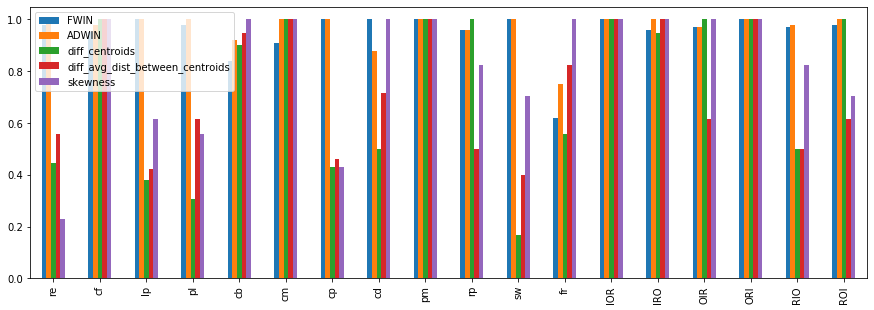

In [70]:
dumas = dumas[["FWIN", "ADWIN"]].copy()

test = get_results_by_best_run(results, best_runs_binary[best_runs_binary.measure == "diff_centroids"], 0).groupby("tipo_mudanca").F1.max()
dumas["diff_centroids"] = test.loc[dumas.index]

test = get_results_by_best_run(results, best_runs_binary[best_runs_binary.measure == "diff_avg_dist_between_centroids"], 0).groupby("tipo_mudanca").F1.max()
dumas["diff_avg_dist_between_centroids"] = test.loc[dumas.index]

test = get_results_by_best_run(results, best_runs_binary[best_runs_binary.measure == "skewness"], 0).groupby("tipo_mudanca").F1.max()
dumas["skewness"] = test.loc[dumas.index]

dumas.plot(kind='bar', figsize=(15, 5))

In [71]:
best_runs.head()

,measure,representation,rolling_window,sliding_window,std_tolerance,window_size,model,detection_type,smooth_factor,F1,maior_igual_dumas
15846,diff_centroids,positions,4.0,0.0,2.00,150.0,kmeans__k=3,tradicional,-1.0,0.567517,15
4448,avg_dist_between_centroids,transitions,4.0,0.0,1.25,150.0,kmeans__k=3,tradicional,-1.0,0.454831,13
32431,dist_intra_cluster,transitions,4.0,0.0,1.25,200.0,kmeans__k=6,tradicional,-1.0,0.440419,11
13662,diff_avg_dist_between_centroids,frequency,4.0,0.0,1.25,200.0,kmeans__k=3,tradicional,-1.0,0.511749,10
2479,Silhouette,transitions,4.0,0.0,2.00,150.0,kmeans__k=6,tradicional,-1.0,0.419059,9


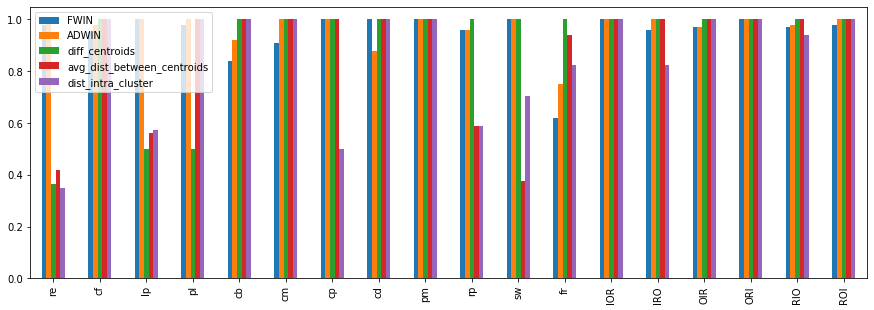

In [72]:
dumas = dumas[["FWIN", "ADWIN"]].copy()

test = get_results_by_best_run(results, best_runs[best_runs.measure == "diff_centroids"], 0).groupby("tipo_mudanca").F1.max()
dumas["diff_centroids"] = test.loc[dumas.index]

test = get_results_by_best_run(results, best_runs[best_runs.measure == "avg_dist_between_centroids"], 0).groupby("tipo_mudanca").F1.max()
dumas["avg_dist_between_centroids"] = test.loc[dumas.index]

test = get_results_by_best_run(results, best_runs[best_runs.measure == "dist_intra_cluster"], 0).groupby("tipo_mudanca").F1.max()
dumas["dist_intra_cluster"] = test.loc[dumas.index]

dumas.plot(kind='bar', figsize=(15, 5))

In [62]:
import gc
gc.collect()

892